In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
purchase_cost = 400
price = 2000
return_cost_price = 150
mean = 25
variance = 20

In [12]:
n = (mean**2)/(mean - variance)
p = mean/n

p, n

(0.2, 125.0)

Optimal order size: 28
Expected profit: 36873.05804317281


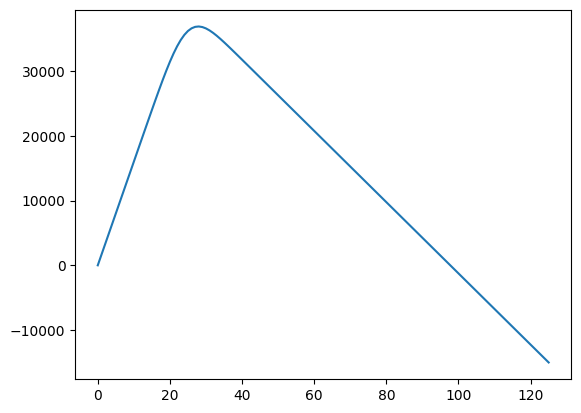

In [5]:
possible_order_sizes = range(int(n) + 1)

def expected_net_profit(order_size, n, p, purchase_cost, price, return_cost_price):
    profit = 0
    for demand in possible_order_sizes:
        sold_items = min(order_size, demand)
        unsold_items = max(0, order_size - demand)
        probability = scipy.stats.binom.pmf(demand, n, p)
        revenue = sold_items * price
        cost = order_size * purchase_cost
        return_cost = unsold_items * return_cost_price
        sol = probability * (revenue - cost - return_cost)
        profit += sol
    return profit

profits = [expected_net_profit(order_size, n, p, purchase_cost, price, return_cost_price) for order_size in possible_order_sizes]
optimal_order_size = possible_order_sizes[np.argmax(profits)]

print(f"Optimal order size: {optimal_order_size}")
print(f"Expected profit: {max(profits)}")



plt.plot(possible_order_sizes, profits)

In [6]:
expected_net_profit(2, n, p, purchase_cost, price, return_cost_price)

3199.999999944983

,Day,Inventory,Demand,Sales,Revenue,Cost,Holding Cost,Net Profit
0,1,14,26,26,52000,1600,2100,48300
1,2,0,30,14,28000,1600,0,26400
2,3,0,31,4,8000,1600,0,6400
3,4,0,22,4,8000,1600,0,6400
4,5,0,26,4,8000,1600,0,6400


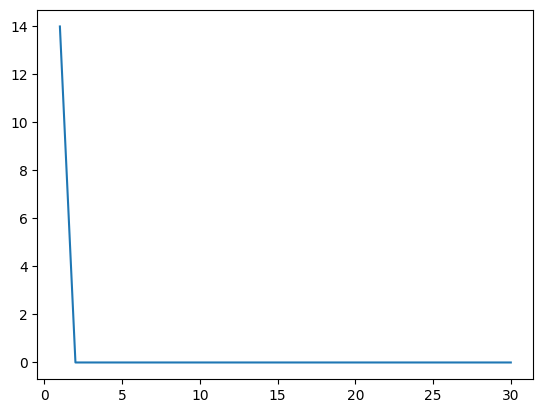

In [16]:
gamma = 0.9  # Discounting factor
initial_inventory = 40  # Starting inventory
daily_order = 4  # Daily order quantity
max_order_size = 10  # Maximum order size
storage_capacity = 40  # Storage capacity
lead_time = 2  # Lead time in days
purchase_cost = 400  # Cost per item
selling_price = 2000  # Selling price per item
holding_cost = 150  # Holding cost per unsold item
num_days = 30  # Number of days to simulate

# Initialize variables
inventory = initial_inventory
orders_in_transit = [0] * lead_time  # Orders in transit for each day

# Data collection
data = []

# Corrected function to calculate binomial demand using numpy's binomial function
def binomial_demand():
    return np.random.binomial(n, p)

# Re-run the simulation loop
data = []
inventory = initial_inventory
orders_in_transit = [0] * lead_time  # Reset orders in transit

for day in range(1, num_days + 1):
    # Receive order from two days ago
    inventory += orders_in_transit.pop(0)
    # Limit inventory to storage capacity
    inventory = min(inventory, storage_capacity)

    # Generate demand and calculate sales
    demand = binomial_demand()
    sales = min(demand, inventory)
    inventory -= sales

    # Calculate revenue and costs
    revenue = sales * selling_price
    cost = daily_order * purchase_cost
    holding_cost_total = inventory * holding_cost

    # Update orders in transit
    orders_in_transit.append(daily_order)

    # Record data
    data.append({
        'Day': day,
        'Inventory': inventory,
        'Demand': demand,
        'Sales': sales,
        'Revenue': revenue,
        'Cost': cost,
        'Holding Cost': holding_cost_total,
        'Net Profit': revenue - cost - holding_cost_total
    })

# Convert data to DataFrame
df = pd.DataFrame(data)

plt.plot(df['Day'], df['Inventory'])
df.head()
  # Display first few rows of the DataFrame


In [8]:
import numpy as np
from scipy.stats import binom, norm


# Parameters
n = 120  # Number of trials in the binomial distribution for demand
p = 0.2  # Probability of success (demand) in each trial
selling_price = 2000  # Price per carton
cost_per_order = 400  # Cost per carton ordered
holding_cost = 150  # Holding cost per carton
order_quantity = 4  # Number of items ordered per day
initial_stock = 40  # Initial inventory
gamma = 0.9  # Discount factor

# Function to simulate one episode
def simulate_episode():
    stock = initial_stock
    total_discounted_cost = 0
    discount_factor = 1

    for _ in range(100):  # Simulating for 100 days
        # Generate demand
        demand = binom.rvs(n, p)

        # Calculate sales and update stock
        sales = min(stock, demand)
        stock -= sales

        # Calculate costs
        revenue = sales * selling_price
        order_cost = order_quantity * cost_per_order
        holding_cost_total = max(0, stock) * holding_cost

        # Update total cost with discounting
        daily_cost = order_cost + holding_cost_total - revenue
        total_discounted_cost += discount_factor * daily_cost

        # Update stock and discount factor for next day
        stock += order_quantity  # Assuming order arrives instantly for simplicity
        stock = min(stock, 40)  # Limit stock based on storage capacity
        discount_factor *= gamma

    return total_discounted_cost

# Run multiple episodes to compute mean and standard deviation
num_episodes = 10000  # Reduced number of episodes for faster computation
costs = [simulate_episode() for _ in range(num_episodes)]
mean_cost = np.mean(costs)
std_dev_cost = np.std(costs)

# Compute 99% confidence interval
z_score = norm.ppf(0.995)  # 99% confidence level
margin_error = z_score * std_dev_cost / np.sqrt(num_episodes)
confidence_interval = (mean_cost - margin_error, mean_cost + margin_error)

print("Mean Total Expected Discounted Cost:", mean_cost)
print("99% Confidence Interval:", confidence_interval)

Mean Total Expected Discounted Cost: -130075.87517047123
99% Confidence Interval: (-130126.2801065716, -130025.47023437086)


In [13]:
import numpy as np
from scipy.stats import binom, norm


# Parameters
n = 125  # Number of trials in the binomial distribution for demand
p = 0.2  # Probability of success (demand) in each trial
selling_price = 2000  # Price per carton
cost_per_order = 400  # Cost per carton ordered
holding_cost = 150  # Holding cost per carton
order_quantity = 4  # Number of items ordered per day
initial_inventory = 40  # Initial inventory
gamma = 0.9  # Discount factor
lead_time = 2  # Lead time in days


# Function to simulate one episode
def simulate_episode():
    inventory = initial_inventory
    total_discounted_cost = 0
    discount_factor = 1
    orders_in_transit = [0] * lead_time  # Orders in transit for each day

    for _ in range(100):  # Simulating for 100 days
        # Generate demand
        demand = binom.rvs(n, p)

        # Calculate sales and update stock
        # Receive order from two days ago
        inventory += orders_in_transit.pop(0)
        inventory = min(inventory, 40)  # Limit stock based on storage capacity
        sales = min(inventory, demand)
        inventory -= sales

        # Calculate costs
        revenue = sales * selling_price
        order_cost = order_quantity * cost_per_order
        holding_cost_total = max(0, inventory) * holding_cost

        # Update total cost with discounting
        daily_cost = order_cost + holding_cost_total - revenue
        total_discounted_cost += discount_factor * daily_cost

        # Place an order and discount factor for next day
        orders_in_transit.append(order_quantity)
        discount_factor *= gamma

    return total_discounted_cost

# Run multiple episodes to compute mean and standard deviation
num_episodes = 10000  # Number of episodes
costs = [simulate_episode() for _ in range(num_episodes)]
mean_cost = np.mean(costs)
std_dev_cost = np.std(costs)

# Compute 99% confidence interval
z_score = norm.ppf(0.995)  # 99% confidence level
margin_error = z_score * std_dev_cost / np.sqrt(num_episodes)
confidence_interval = (mean_cost - margin_error, mean_cost + margin_error)

print("Mean Total Expected Discounted Cost:", mean_cost)
print("99% Confidence Interval:", confidence_interval)

Mean Total Expected Discounted Cost: -123520.95457047119
99% Confidence Interval: (-123562.98290817896, -123478.92623276342)


In [14]:
import numpy as np

# Define the MDP components
states = [(a, b) for a in range(41) for b in range(11)]  # State space: inventory levels and incoming stock
actions = list(range(11))  # Action space: number of items to order
gamma = 0.9  # Discount factor
theta = 0.001  # Threshold for convergence
n = 125  # Number of trials in the binomial distribution for demand
p = 0.2  # Probability of success (demand) in each trial
selling_price = 2000  # Price per carton
cost_per_order = 400  # Cost per carton ordered
holding_cost = 150  # Holding cost per carton

# Reward 
def reward(s, a):
    a_prime, b_prime = s
    expected_reward = 0

    for demand in range(n + 1):
        sales = min(a_prime, demand)
        unsold_items = max(0, a_prime - demand)
        revenue = sales * selling_price
        cost = a * cost_per_order
        holding_cost_total = unsold_items * holding_cost
        expected_reward += (revenue - cost - holding_cost_total) * binom.pmf(demand, n, p)

    return expected_reward    

# Transition probability
def transition_probability(s, action, s_prime):
    a, b = s
    a_prime, b_prime = s_prime

    demand = a + b - a_prime

    if demand < 0:
        return 0
    
    return binom.pmf(demand, n, p)
    
# Value Iteration Algorithm
def value_iteration(states, actions, gamma, theta):
    V = {s: 0 for s in states}  # Initialize value function
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max(sum(transition_probability(s, a, s_prime) *
                           (reward(s, a) + gamma * V[s_prime]) for s_prime in states)
                       for a in actions)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V

# Compute optimal value function
V_star = value_iteration(states, actions, gamma, theta)

# Derive the optimal policy
policy = {s: max(actions, key=lambda a: sum(transition_probability(s, a, s_prime) *
                                            (reward(s, a) + gamma * V_star[s_prime]) for s_prime in states))
          for s in states}

# V_star and policy now contain the optimal values and actions for each state

: 